In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

last run on 2018-02-21 21:18:26.836500


In [2]:
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/'
figDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Figs/'

In [3]:
# read in data

# original Data
s1 = pd.read_csv(os.path.join(dataDir, "simulationData1_withFinalX.csv"))
s2 = pd.read_csv(os.path.join(dataDir, "simulationData2_withFinalX.csv"))
s3 = pd.read_csv(os.path.join(dataDir, "simulationData3_withFinalX.csv"))
s4 = pd.read_csv(os.path.join(dataDir, "simulationData5_withFinal_testset.csv"))

In [4]:
# Jorge's small dataset
s11 = pd.DataFrame(scipy.io.loadmat(os.path.join(dataDir, "ValSp3_1_am_conX.mat"))['ValSp3'])
s22 = pd.DataFrame(scipy.io.loadmat(os.path.join(dataDir, "ValSp3_2_am_conX.mat"))['ValSp3'])
s33 = pd.DataFrame(scipy.io.loadmat(os.path.join(dataDir, "ValSp3_3_am_conX.mat"))['ValSp3'])
s44 = pd.DataFrame(scipy.io.loadmat(os.path.join(dataDir, "ValSp3_1_am_con4.mat"))['ValSp3'])

In [5]:
s11.columns = ['x_99', 'y_99', 'theta_99', 'phi_99', 'x_dot_99',
       'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'tao','F', 'alpha',  'runtime']

In [6]:
s11.head()

,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao,F,alpha,runtime
0,6.202621,-11.631341,0.907438,5.418089,7.282538,62.501887,2.933329,5.245930,-63793.186175,12498.670184,1.485781,0.337176
1,7.769831,-13.300072,1.038628,4.563811,357.076500,-1096.138013,-1.233882,1.084760,-76528.453583,40043.397556,3.885149,0.100299
2,5.508284,-9.572433,1.200948,4.507487,-44.489263,-407.752039,14.712257,8.858473,50631.994084,31193.260941,2.781195,0.112350
3,-2.756172,9.058861,1.308325,5.341325,-226.407871,34.794522,5.173236,2.426684,81420.239048,3281.311340,5.546422,0.115598
4,6.152431,0.890639,0.925807,4.324700,408.294919,-496.908346,-2.863265,-0.165125,-88785.225730,24701.974168,4.929632,0.145824


In [ ]:
# show missing
plt.figure(figsize=(20,100))
plt.imshow(s11, cmap='hot', interpolation='nearest')

plt.show()

In [7]:
s1.columns  = ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'x_99_pred', 'y_99_pred', 'theta_99_pred', 'phi_99_pred', 'x_dot_99_pred',
       'y_dot_99_pred', 'theta_dot_99_pred', 'phi_dot_99_pred', 'F', 'alpha', 'tao', 'Fx',
       'Fy', 'F_', 'alpha_', 'tao_pred', 'Fx_pred', 'Fy_pred', 'F_pred',
       'alpha_pred']
s1.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99_pred,y_99_pred,...,tao,Fx,Fy,F_,alpha_,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,4.400063,-11.425972,0.761058,5.239797,171.701675,-91.368073,18.392160,18.365949,6.164918,-11.613386,...,-61565.373739,996.104052,12677.001182,12716.075741,1.492382,-63793.186175,1061.297225,12453.529803,12498.670184,1.485781
1,2.185919,1.359633,1.047558,4.549883,198.496327,-368.587997,-1.570617,1.220019,7.689498,-13.248871,...,-74441.053507,-29455.265907,-26572.631150,39670.107335,3.875586,-76528.453583,-29474.589500,-27105.760672,40043.397556,3.885149
2,2.580331,-5.724311,1.118963,4.447157,345.964162,16.931746,-0.849197,1.298328,5.468831,-9.555568,...,49688.658341,-29196.825199,11236.966925,31284.565322,2.774197,50631.994084,-29189.302814,11000.187696,31193.260941,2.781195
3,2.300297,8.474293,1.218912,5.279960,-282.178321,25.384868,0.512417,3.815208,-2.758413,9.058949,...,78973.324049,2427.365213,-2196.134833,3273.394276,5.547757,81420.239048,2430.294704,-2204.693121,3281.311340,5.546422
4,2.066322,8.852613,0.939100,4.311036,-1.787126,-299.145154,-0.511141,2.625030,6.107748,0.878515,...,-94927.626344,5131.505747,-23965.752116,24508.970311,4.923322,-88785.225730,5324.227804,-24121.362442,24701.974168,4.929632


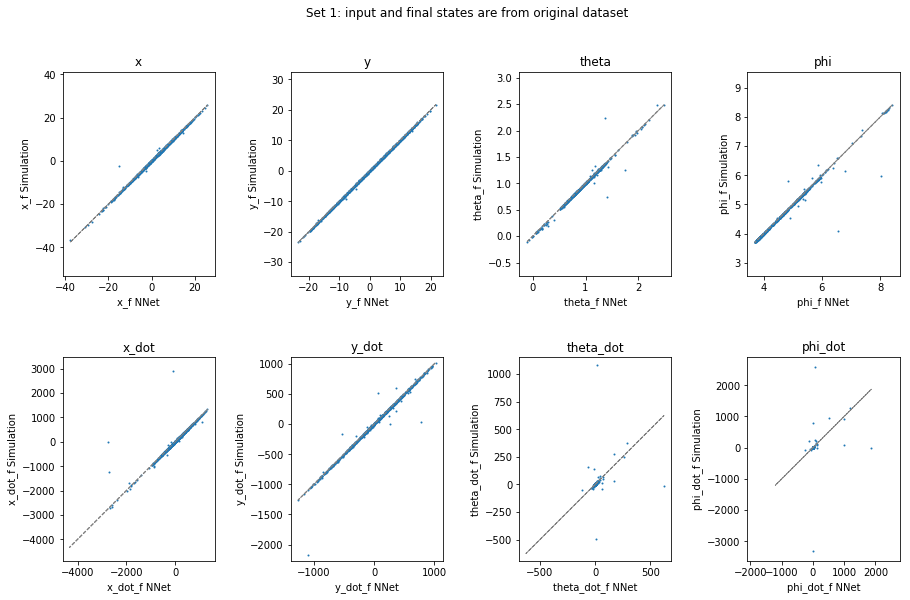

In [8]:
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=0.5)

axs = axs.ravel()
fig.suptitle("Set 1: input and final states are from original dataset")


for ii in np.arange(0,8):
    axs[ii].plot(s1.iloc[:,ii + 8], s1.iloc[:,ii + 8], c= 'grey', linewidth = 1, linestyle = "--")
    axs[ii].set_aspect('equal', 'datalim')
    axs[ii].scatter(x = s1.iloc[:,ii + 8], y = s11.iloc[:, ii],s = 1)
    
    if ii >= 4:
        jj = 2
    else:
        jj= 1
    axs[ii].set_title(str("_".join(s1.columns[ii + 8].split("_")[0:jj])))
    axs[ii].set_xlabel(str("_".join(s1.columns[ii + 8].split("_")[0:jj])) + "_f NNet")
    axs[ii].set_ylabel(str("_".join(s1.columns[ii + 8].split("_")[0:jj])) + "_f Simulation")
    
    


    
fig.savefig(os.path.join(figDir, "Sim1.pdf"), bbox_inches='tight')

In [ ]:
s2.head()


In [ ]:
s22.columns = ['x_99', 'y_99', 'theta_99', 'phi_99', 'x_dot_99',
       'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'tao','F', 'alpha',  'runtime']
s22.head()

In [ ]:
plt.figure(figsize=(20,100))
plt.imshow(s22, cmap='hot', interpolation='nearest')

# print num of rows with NA
# show how many NA's were dropped
print(s22.shape[0] - s22.dropna().shape[0], s22.shape[0])

plt.show()


In [ ]:
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=0.5)

axs = axs.ravel()
fig.suptitle("Set 2: random initial and output (combination is not in training data)")


for ii in np.arange(0,8):
    axs[ii].plot(s2.iloc[:,ii + 8], s2.iloc[:,ii + 8], c= 'grey', linewidth = 1, linestyle = "--")
    axs[ii].set_aspect('equal', 'datalim')
    axs[ii].scatter(x = s2.iloc[:,ii + 8], y = s22.iloc[:, ii],s = 1)
    
    if ii >= 4:
        jj = 2
    else:
        jj= 1
    axs[ii].set_title(str("_".join(s2.columns[ii + 8].split("_")[0:jj])))
    axs[ii].set_xlabel(str("_".join(s2.columns[ii + 8].split("_")[0:jj])) + "_f NNet")
    axs[ii].set_ylabel(str("_".join(s2.columns[ii + 8].split("_")[0:jj])) + "_f Simulation")
    
    


    
fig.savefig(os.path.join(figDir, "Sim2.pdf"), bbox_inches='tight')

In [ ]:
s33.columns = ['x_99', 'y_99', 'theta_99', 'phi_99', 'x_dot_99',
       'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'tao','F', 'alpha',  'runtime']
s33.head()

In [ ]:
s3.head()

In [ ]:
plt.figure(figsize=(20,100))
plt.imshow(s33, cmap='hot', interpolation='nearest')

# print num of rows with NA
# show how many NA's were dropped
print(s33.shape[0] - s33.dropna().shape[0], s33.shape[0])

plt.show()

In [ ]:
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=0.5)

axs = axs.ravel()
fig.suptitle("Set 3: same initial states from training, but random final state")


for ii in np.arange(0,8):
    axs[ii].plot(s3.iloc[:,ii + 8], s3.iloc[:,ii + 8], c= 'grey', linewidth = 1, linestyle = "--")
    axs[ii].set_aspect('equal', 'datalim')
    axs[ii].scatter(x = s3.iloc[:,ii + 8], y = s33.iloc[:, ii],s = 1)
    
    if ii >= 4:
        jj = 2
    else:
        jj= 1
    axs[ii].set_title(str("_".join(s3.columns[ii + 8].split("_")[0:jj])))
    axs[ii].set_xlabel(str("_".join(s3.columns[ii + 8].split("_")[0:jj])) + "_f NNet")
    axs[ii].set_ylabel(str("_".join(s3.columns[ii + 8].split("_")[0:jj])) + "_f Simulation")
    
    


    
fig.savefig(os.path.join(figDir, "Sim3.pdf"), bbox_inches='tight')

## Set 4

In [9]:
s4.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,y_99,...,theta_dot_99,phi_dot_99,tao,Fx,Fy,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,0,0,0.795294,3.790989,239.937302,309.348620,0.404731,1.594923,4.816044,-0.564773,...,-4.341190,-2.134953,-77433.033185,-25628.131415,-25523.878200,-74216.783633,-25709.938231,-25442.874055,36170.993407,3.921770
1,0,0,0.644764,4.763821,60.202435,148.059332,7.160955,5.271670,5.503482,8.482467,...,-3.218599,-3.361796,18089.782425,37940.533360,9762.998893,19305.300090,37968.800743,10039.283056,39273.617533,0.258493
2,0,0,0.893044,4.201614,-223.457896,-115.794523,1.574985,4.389546,-6.088273,-1.646655,...,6.690121,8.437772,-60364.180694,-1595.364131,10278.321177,-60332.190646,-1621.528650,10007.333363,10137.853629,1.731434
3,0,0,0.731254,3.790280,96.881935,433.571014,3.494534,1.151334,1.172913,7.870384,...,2.298592,-0.526332,85436.509798,-5325.574919,299.875035,84905.065321,-5307.368370,243.343592,5312.944111,3.095775
4,0,0,0.775803,5.883445,-293.943864,-93.559409,1.898227,4.144514,-5.085509,1.862793,...,-1.350964,-1.797883,11771.326101,18384.826107,11987.076192,13507.583614,18762.032149,11914.613678,22225.477935,0.565786


In [10]:
s44.columns = ['x_99', 'y_99', 'theta_99', 'phi_99', 'x_dot_99',
       'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'tao','F', 'alpha',  'runtime']
s44.head()

,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao,F,alpha,runtime
0,4.796923,-0.565682,0.759133,3.776248,235.409363,-365.420606,-4.263250,-2.149968,-74216.783633,36170.993407,3.921770,0.072036
1,5.476568,8.525087,0.661876,4.776247,486.741329,703.706275,-3.077513,-3.304800,19305.300090,39273.617533,0.258493,0.067261
2,-6.052264,-1.679652,0.994224,4.321400,-384.386005,-53.794392,6.560577,8.314896,-60332.190646,10137.853629,1.731434,0.063475
3,1.182190,7.865172,0.770417,3.801262,22.825476,351.322508,2.284565,-0.520885,84905.065321,5312.944111,3.095775,0.090870
4,-5.027922,1.902555,0.796959,5.900091,-211.141503,284.800730,-1.353988,-1.867826,13507.583614,22225.477935,0.565786,0.057272


687 65628


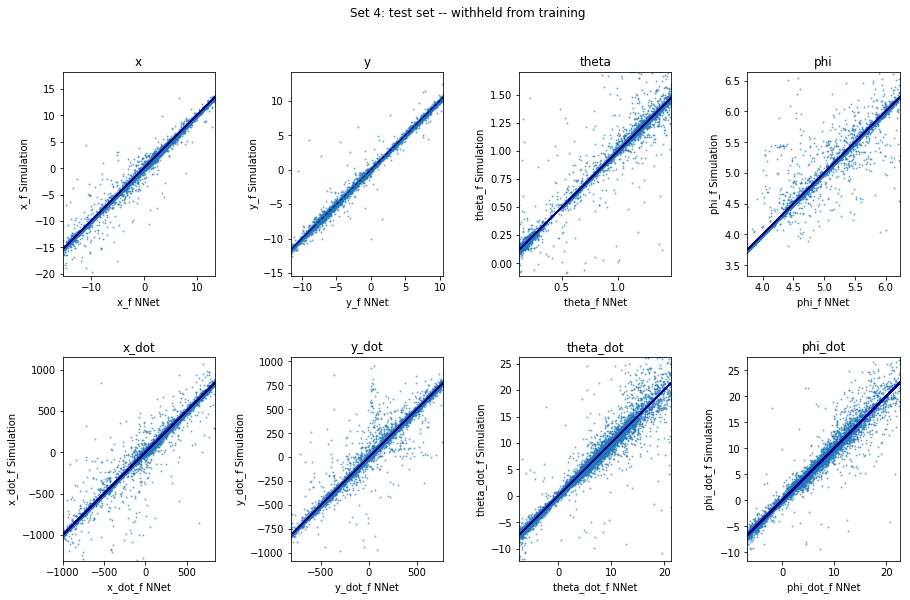

In [33]:
plt.figure(figsize=(20,100))
#plt.imshow(s44, cmap='hot', interpolation='nearest')

# print num of rows with NA
# show how many NA's were dropped
print(s44.shape[0] - s44.dropna().shape[0], s44.shape[0])

#plt.show()


plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=0.5)

axs = axs.ravel()
fig.suptitle("Set 4: test set -- withheld from training")


for ii in np.arange(0,8):
    axs[ii].plot(s4.iloc[:,ii + 8], s4.iloc[:,ii + 8], c= 'darkblue', linewidth = 1, linestyle = "--")
    axs[ii].set_aspect('equal', 'datalim')
    axs[ii].scatter(x = s4.iloc[:,ii + 8], y = s44.iloc[:, ii],s = 1, alpha = 0.5)

    
    if ii >= 4:
        jj = 2
    else:
        jj= 1
    axs[ii].set_title(str("_".join(s4.columns[ii + 8].split("_")[0:jj])))
    axs[ii].set_xlabel(str("_".join(s4.columns[ii + 8].split("_")[0:jj])) + "_f NNet")
    axs[ii].set_ylabel(str("_".join(s4.columns[ii + 8].split("_")[0:jj])) + "_f Simulation")
    
    axs[ii].set_xlim(np.percentile(s4.iloc[:,ii + 8], [2.5, 97.5], axis = 0))
    axs[ii].set_ylim(np.percentile(s4.iloc[:,ii + 8], [2.5, 97.5], axis = 0))
    
    


    
fig.savefig(os.path.join(figDir, "Sim4.png"), dpi = 400, bbox_inches='tight')

In [17]:
np.percentile(s4.iloc[:,ii + 8], [5, 95], axis = 0)

array([ -4.79776471,  10.83914989])

In [ ]:
## refref: plot spray


In [ ]:
## make another dataset that has same initial data as training set
## 